In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import ensemble,pipeline,preprocessing, cross_validation,model_selection,linear_model,metrics,grid_search 
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency
from sklearn.ensemble import VotingClassifier
import warnings
%pylab inline
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


### Чтение данных

In [4]:
X = pd.read_csv('orange_small_churn_train_data.csv',index_col='ID')
Y = X['labels']
X.drop(['labels'],inplace=True,axis=1)

In [5]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [7]:
X.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [19]:
def get_info(X):
    '''
    X - pd.DataFrame.
    DF_var - pd.DataFrame contains info about each columns of X: count unique values and percent of missing values. 
    '''
    DF_var = pd.DataFrame(columns = ['n_values', 'NaN'])
    for var in X.columns:
        NaN_count = round(sum(X[var].isnull())*100/len(X),1)
        DF_var.at[var]=[len(X[var].dropna().unique()),NaN_count]
    return DF_var

In [28]:
DF_var = get_info(X)

In [29]:
get_info(X).head()

,n_values,NaN
Var1,17,98
Var2,2,97
Var3,129,97
Var4,4,96
Var5,444,97


Списки категориальных и вещественных переменнх:

In [37]:
Float_var =  list(set(X.columns[:190])- set(DF_var[(DF_var.n_values<100)].index))
Categorical_var = list(set(DF_var[(DF_var.n_values<100)&(DF_var.n_values>0)].index))

Удалены пустые переменные и категориальные переменные с более чем $100$ уникальными занчениями.

In [8]:
X = X[Categorical_var+Float_var]

Итого $-30$ признаков.

In [9]:
X.shape

(40000, 200)

####  Обработка вещественнх признаков 

Заменить 0.5% экстремальных значений их разумными аналогами 

In [10]:
def clear_outliers(df,Float_var,thr=0.5):
    """
    df -- pd.DataFrame;
    Float_var - list of float variables;
    thr - threshold of replacement rare variables, by persent;
    """
    X=df.copy()       
    for var in Float_var:
            mean = X[var].mean()
            arr_p= np.percentile(X[~X[var].isnull()][var],[thr/2, 100-thr/2]) 
            X.at[X[var]<arr_p[0],var]=mean
            X.at[X[var]>arr_p[1],var]=mean
    return X

In [11]:
X = clear_outliers(X, Float_var)

Заполнение средними 

In [12]:
def calculate_means(float_data):  
    means = [] 
    for col in float_data.columns:
        means.append(float_data[col].mean())
    return pd.Series(means, float_data.columns)

In [13]:
X[Float_var] = X[Float_var].fillna(calculate_means(X[Float_var])) 

Заполение нулями 

In [236]:
X[Float_var] = X[Float_var].fillna(0) 

####  1.3 Обработка категориальных признаков 

Преобразование стобцов к типу $str$ приводит к тому что все значения признаков $np.NaN$ преобразуются в строки $'nan'$,
Кроме того редкие хэши заменяются $'Rare'$ чтобы не увеличивать размерность данных при dummy кодировании:

In [16]:
def clear_categorical(df,Categorical_var,thr=0.005): 
    X = df.copy()
    X[Categorical_var]= X[Categorical_var].astype(str)
    for col in Categorical_var:
        d = dict(X[col].value_counts(dropna=True)/ len(X)) 
        X[col] = X[col].apply(lambda x: 'Rare' if d[x] <= thr else x)
    return X

In [17]:
X = clear_categorical(X,Categorical_var)

#### Labelling

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
for column in Categorical_var:
    X[column]=le.fit_transform(X[column])

#### Нормализация вещественных переменных и one-hot-encoding остальных

In [20]:
Float_data_indices = np.array([(column in Float_var) for column in X.columns], dtype = bool)
Cat_data_indices = np.array([(column in Categorical_var) for column in X.columns], dtype = bool)

In [21]:
Transformer = pipeline.FeatureUnion(transformer_list = [        
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X: X[:, Float_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X: X[:, Cat_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])

In [22]:
X_transform = Transformer.fit_transform(X) 

In [23]:
X_transform.shape

(40000, 650)

Преобразуем sparce матрицу обратно в DataFrame восстанавливая названия столбов, в том числе и для категориальных переменных.

In [24]:
array_cat = []
first = 0
for var, i  in zip(Categorical_var, Transformer.transformer_list[1][1].steps[1][1].feature_indices_[1:]):
    array_cat[first:i]= [var]*(i-first)
    first = i
array_cat =np.array(array_cat) 

In [25]:
X_transform= pd.DataFrame( data= X_transform.toarray(), columns= list(Float_var)+list(array_cat))

In [26]:
X_transform.shape

(40000, 650)

In [27]:
X_transform.head()

,Var114,Var117,Var111,Var113,Var112,Var86,Var150,Var135,Var134,Var119,...,Var176,Var176,Var174,Var174,Var174,Var179,Var179,Var179,Var178,Var178
0,4.147306,2.539851,3.85506,-1.804387,1.728743,5.396889,2.401708,8.466828,1.083075,1.694178,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4.147306,2.539851,3.85506,0.623253,0.864371,5.396889,2.401708,8.466828,0.626548,1.046104,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,4.147306,2.539851,3.85506,-0.185896,0.576248,5.396889,2.401708,8.466828,1.946869,0.602148,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.147306,2.539851,3.85506,0.564410,0.384165,5.396889,2.401708,8.466828,1.165727,1.464546,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4.147306,2.539851,3.85506,0.212660,0.096041,5.396889,2.401708,8.466828,1.152152,0.500089,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Общая корявенькая функция препроцессинга 

In [23]:
def data_preprocessing(X, Categorical_var, Float_var, thr_float=0.005, thr_cat=0.005, fill = 'mean'):
    X_p = X.copy()
    X_p = X_p[Categorical_var+Float_var]
    X_p = clear_outliers(X_p, Float_var, thr_float*100)
    
    if fill == 'mean':
        X_p[Float_var] = X_p[Float_var].fillna(calculate_means(X_p[Float_var]))
    else: 
        X_p[Float_var] = X_p[Float_var].fillna(0) 
        
    X_p = clear_categorical(X_p,Categorical_var,thr_cat)
    
    le = preprocessing.LabelEncoder()
    
    for column in Categorical_var:
        X_p[column]=le.fit_transform(X_p[column])
    
    Float_data_indices = np.array([(column in Float_var) for column in X_p.columns], dtype = bool)
    Cat_data_indices = np.array([(column in Categorical_var) for column in X_p.columns], dtype = bool)
    
    Transformer = pipeline.FeatureUnion(transformer_list = [        
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X_p: X_p[:, Float_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda X_p: X_p[:, Cat_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])
    X_p_transform = Transformer.fit_transform(X_p)  
    
    array_cat = []
    first = 0
    for var, i  in zip(Categorical_var, Transformer.transformer_list[1][1].steps[1][1].feature_indices_[1:]):
        array_cat[first:i]= [var]*(i-first)
        first = i
    array_cat = np.array(array_cat) 
        
       
    X_p_transform = pd.DataFrame( data = X_p_transform.toarray(), columns= list(Float_var)+list(array_cat))
        
    return X_p_transform    

## Построение модели

#### cv_strategy

In [29]:
cv_strategy = cross_validation.StratifiedKFold(Y, n_folds = 5, random_state = 0)

#### SVM

Просто попробовал

In [26]:
from sklearn import svm 

In [30]:
SVC = svm.SVC(class_weight='balanced', C=0.05,)

In [32]:
%time scoring = cross_validation.cross_val_score(SVC, X_transform, Y, scoring = 'roc_auc', cv = cv_strategy)
print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

Wall time: 1h 10min 16s
mean: 0.660843071969, std: 0.00611730782823


#### GradientBoostingClassifier

In [31]:
GBC = ensemble.GradientBoostingClassifier(max_depth=3,n_estimators=100,learning_rate=0.1,subsample=0.66)

In [32]:
%time scoring = cross_validation.cross_val_score(GBC, X_transform, Y, scoring = 'roc_auc', cv = cv_strategy)

print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

Wall time: 6min 45s
mean: 0.729354903493, std: 0.00626670714704


In [37]:
%time predict = cross_validation.cross_val_predict(GBC, X_transform, Y, cv = cv_strategy)

print metrics.classification_report(Y, predict)

Wall time: 6min 55s
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96     37024
          1       0.57      0.03      0.05      2976

avg / total       0.90      0.93      0.89     40000



In [117]:
train_data, hold_out_data, train_labels, hold_out_labels = cross_validation.train_test_split(X_transform, Y, stratify = Y, test_size = 0.2)

Найдем наиболее важные признаки для градиентного бустинга

In [120]:
GBC.fit(train_data, train_labels)
y_score = GBC.predict(hold_out_data)

Значения feature_importances для всех переменных производных от одной категориальной складывались

In [121]:
Feature_importance = sorted(zip(map(lambda x: int(x[3:]),X_transform.columns), GBC.feature_importances_),key = lambda x: x[1], reverse = True)
Feature_importance = pd.DataFrame(Feature_importance, columns = ['Var', 'Imp']).groupby('Var').sum()
Feature_importance.sort_values('Imp',ascending=False,inplace=True)
Importance_categorical = Feature_importance[Feature_importance.index>190]
Importance_float =Feature_importance[Feature_importance.index<190]

In [332]:
Importance_float.head()

,Imp
Var,
126,0.158840
113,0.064165
189,0.055437
57,0.048102
73,0.036536


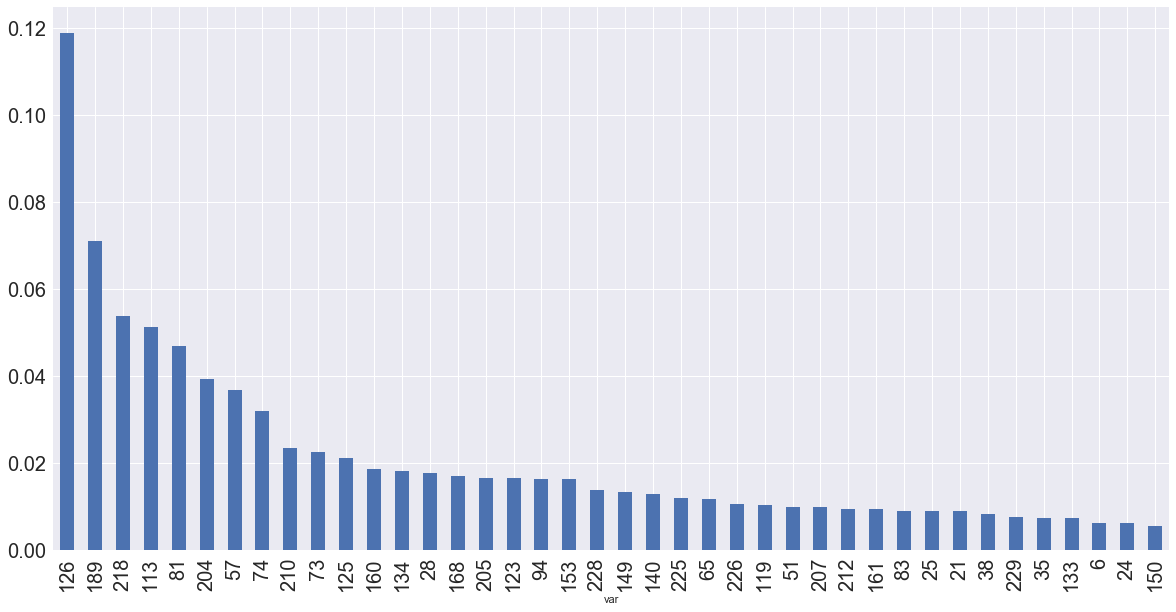

In [120]:
Importance_float[:40].plot(x='var', y='Imp', kind='bar',figsize=(20,10),fontsize=20,legend=False) 

In [148]:
def confusions_matrix(XSeries,YSeries):
    confusions = []
    XFactors = XSeries.value_counts().axes[0]
    YFactors = YSeries.value_counts().axes[0]
    matrix = pd.DataFrame(columns=YFactors, index=XFactors )
    for XFactor in XFactors:
        for YFactor in YFactors :
            a = (XSeries == XFactor) 
            b = (YSeries == YFactor)
            matrix.at[XFactor, YFactor] = sum(((a==1) & (b==1)).values)
    
    return np.array(matrix)

Расчет корреляции V Крамера

In [149]:
def v_cramer(confusion_matrix):
    n = confusion_matrix.sum()
    if n > 40 and (len(confusion_matrix[confusion_matrix<5])/float(confusion_matrix.shape[0]*confusion_matrix.shape[1])<0.2):      
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        output = np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
    else:
        output=0
    return output

In [155]:
VC_array = []
for var in  Categorical_var:  
    conf_matrix = confusions_matrix(X[var],Y)
    V = v_cramer(conf_matrix)
    VC_array.append((var,V))

In [ ]:
sorted(VC_array,key = lambda x:x[1],reverse=True)

## Варианты градиентного бустинга

In [134]:
cv_strategy = cross_validation.StratifiedKFold(Y, n_folds = 10, random_state = 0)

In [135]:
GBC = ensemble.GradientBoostingClassifier(max_depth=3 ,n_estimators=300,learning_rate=0.1,min_samples_split=5, subsample=0.66)
predict = sklearn.model_selection.cross_val_predict(GBC, X_transform, Y, method= 'predict_proba', cv = cv_strategy)

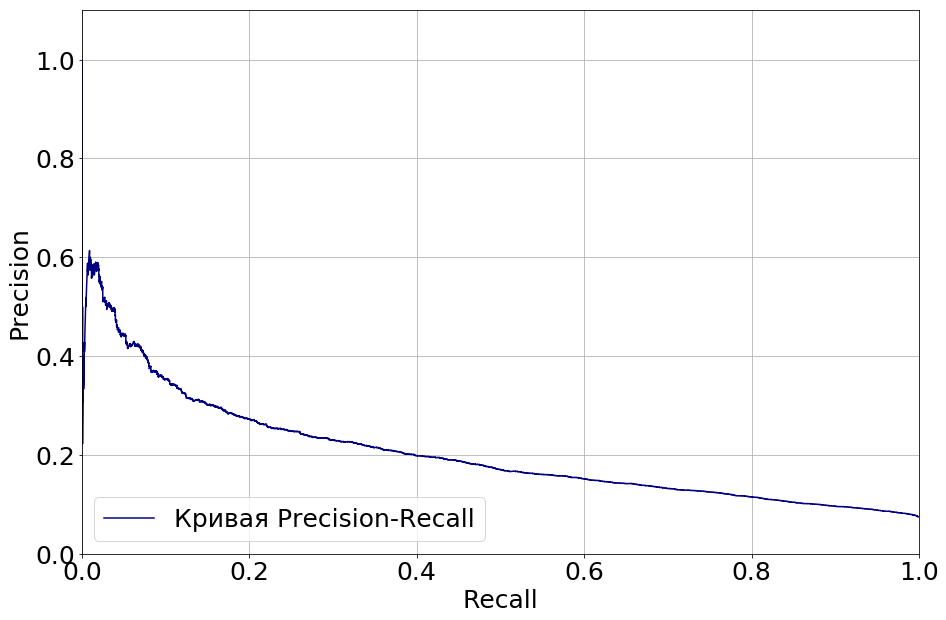

In [136]:
plot_precision_recall_curve(Y,predict[:,1])

In [137]:
GBC = ensemble.GradientBoostingClassifier(max_depth=4 ,n_estimators=800,learning_rate=0.01, subsample=0.66)
% time predict_2 = sklearn.model_selection.cross_val_predict(GBC, X_transform, Y, method= 'predict_proba', cv = cv_strategy)

Wall time: 2h 52min 12s


In [275]:
precision, recall, thresholds  = metrics.precision_recall_curve(Y, predict_2[:,1])

In [333]:
DDF =  pd.DataFrame(precision,recall,columns=['precision'])
DDF['thresholds'] = [0]+list(thresholds)

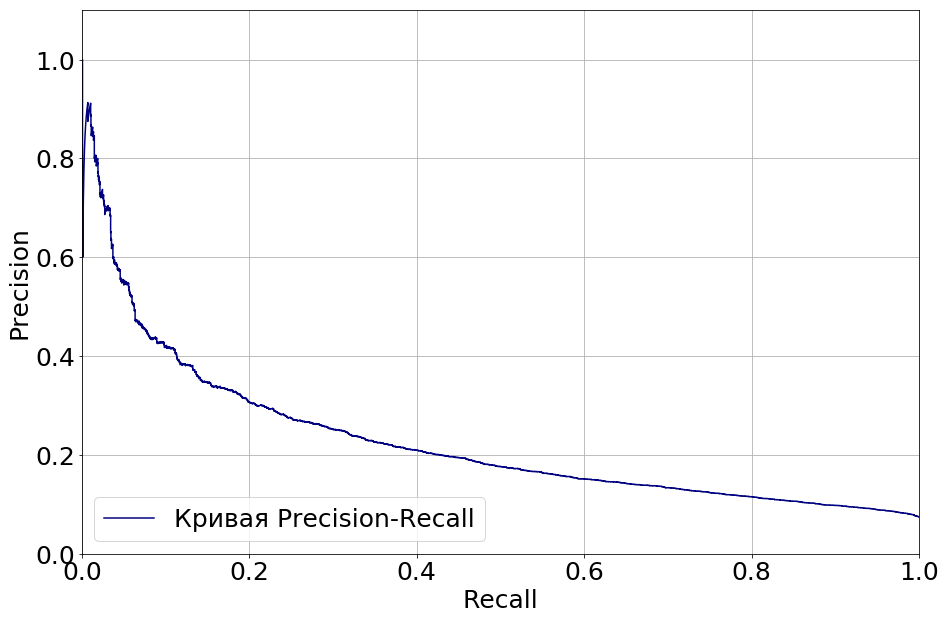

In [303]:
plot_precision_recall_curve(Y,predict_2[:,1])

In [351]:
seed = 7
hold_out_size = 0.2
X_train, X_hold_out, y_train, y_hold_out = cross_validation.train_test_split(X_transform, Y, test_size=hold_out_size, \
                                                                             random_state=seed)
GBC_l = ensemble.GradientBoostingClassifier(max_depth=5 ,n_estimators=1000,learning_rate=0.01,subsample=0.3)

X_balanced,Y_balanced = random_undersampling(X_train, y_train, 0.1)
GBC_l.fit(X_balanced,Y_balanced)
print 'Доля минорного класса: {}'.format(0.1)
print metrics.classification_report(y_hold_out, GBC_l.predict(X_hold_out))
print metrics.roc_auc_score(y_hold_out,GBC_l.predict_proba(X_hold_out)[:,1])

Доля минорного класса: 0.3
             precision    recall  f1-score   support

         -1       0.93      0.99      0.96      7384
          1       0.44      0.05      0.09       616

avg / total       0.89      0.92      0.89      8000

0.741667663323


## Cтекинг алгоритмов

In [173]:
def Stack_v2(n_levels, k_folds, X, Y, Z, a, M):
    """
    X,Y - данные и метки для обучения
    Z - выбока для получения значений целевой метки
    a - базвый алгорит 
    M - метаалгоритм 
    
    Подробнее в записке 
    """ 
    X_train = X.copy()
    X_train.index = range(0,len(X_train))
    
    X_MF = pd.DataFrame(index=range(0,len(X_train)))
   
    Y_train = Y.copy()
    Y_train.index = range(0,len(Y_train))
    
    Z_predict = Z.copy()
    Z_predict.index = range(0,len(Z_predict))
    
    Z_MF = pd.DataFrame(index=range(0,len(Z_predict)))
    
    column = X_train.shape[1]

    
    for i in xrange(1,n_levels+1):
        print i
        skf = StratifiedKFold(Y_train.values, n_folds=k_folds)
        

        MF  = pd.Series()
        MF_Z = np.array([0.]*len(Z_predict))
        
        for train_index, test_index in skf:
            a.fit(X_train.iloc[train_index], Y_train.iloc[train_index])
            prediction = a.predict_proba(X_train.iloc[test_index])[:,1]
            MF = pd.concat([MF,pd.Series(data=prediction, index=test_index)],axis=0, join='inner')

            MF_Z+=np.array(a.predict_proba(Z_predict)[:,1])


        X_MF['col'+str(i)]=MF.values
        Z_MF['col'+str(i)]=MF_Z/k_folds

    X_train['new']=X_MF.apply(sum,axis=1)/n_levels 

    Z_predict['new']=Z_MF.apply(sum,axis=1)/n_levels 
    
    
    M.fit(X_train,Y_train)
    P = M.predict_proba(Z_predict)
    return P

In [171]:
from sklearn.cross_validation import StratifiedKFold

In [176]:
train_data, hold_out_data, train_labels, hold_out_labels = cross_validation.train_test_split(X_transform, Y, stratify =Y, test_size = 0.2)
GBC_b = ensemble.GradientBoostingClassifier(max_depth=4 ,n_estimators=800,learning_rate=0.01, subsample=0.66)
LR_a = linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: 5, -1: 1})
p = Stack_v2(5, 25, train_data,train_labels,hold_out_data, LR_a , GBC_b)

1
2
3
4
5


In [175]:
metrics.roc_auc_score(hold_out_labels, p[:,1]) # 1,10

0.72970954215582251

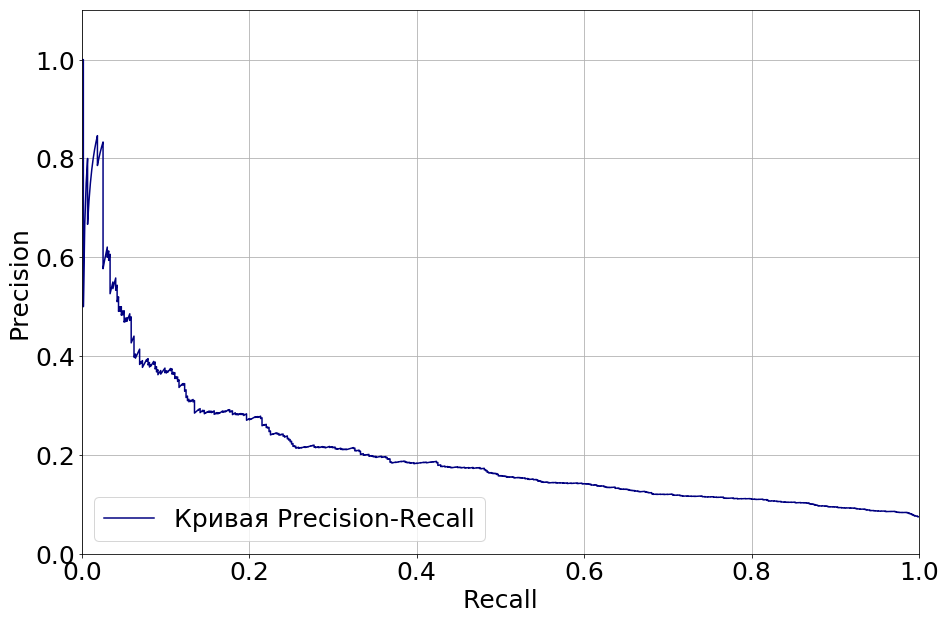

In [335]:
plot_precision_recall_curve(hold_out_labels, p[:,1])

### Построение кривых обучения 

In [80]:
train_sizes_abs, train_scores, test_scores = model_selection.learning_curve(GBC, X_transform, Y, scoring = 'roc_auc',\
                                            train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, cv=cv_strategy)

In [93]:
def plot_learning_curve(train_sizes, train_scores, test_scores):
    plt.figure(figsize=(15,10))
    plt.xlabel(u"Размер обучающей выборки",fontsize = 25)
    plt.ylabel("AUC ROC",fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - 2.*train_scores_std,
                     train_scores_mean + 2.*train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - 2.*test_scores_std,
                     test_scores_mean + 2.*test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label=u"AUC на обучающей выборке")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label=u"AUC на кросс-валидации")

    plt.legend(loc="best",fontsize = 25)
    plt.show()

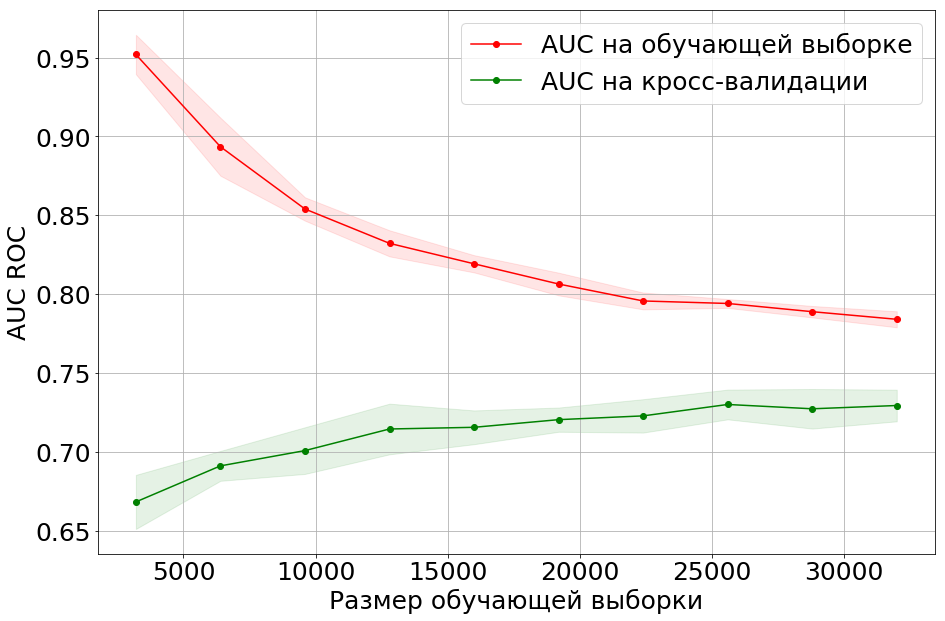

In [94]:
plot_learning_curve(train_sizes_abs, train_scores, test_scores)

In [95]:
train_sizes_abs, train_scores, test_scores = model_selection.learning_curve(LR, X_transform, Y, scoring = 'roc_auc',\
                                            train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, cv=cv_strategy)

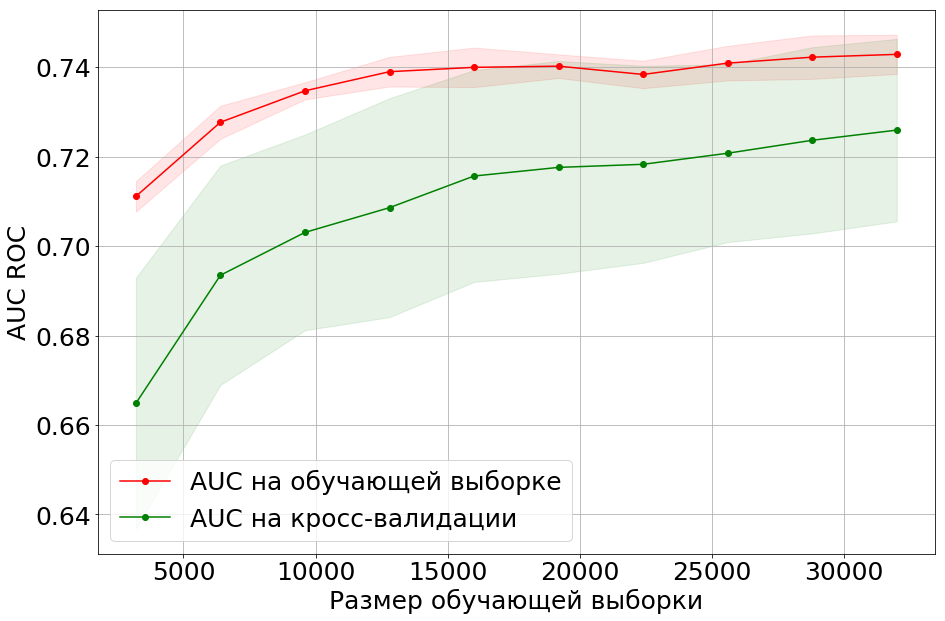

In [96]:
plot_learning_curve(train_sizes_abs, train_scores, test_scores)

## Балансировка весов для логистической регрессии

In [152]:
scoring_array = []
for weight_ch in [1,5,10,15,20,25]:
    LR = linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: weight_ch, -1: 1})
    scoring = cross_validation.cross_val_score(LR, X_transform, Y, scoring = 'roc_auc', cv = cv_strategy)
    scoring_array.append(scoring)
    print 'Вес оттока: {}, mean: {}, std: {}'.format(weight_ch, scoring.mean(), scoring.std())

Вес оттока: 1, mean: 0.721822429345, std: 0.00984475698499
Вес оттока: 5, mean: 0.730431956343, std: 0.0097625965448
Вес оттока: 10, mean: 0.730351074774, std: 0.00947463846693
Вес оттока: 15, mean: 0.729326979617, std: 0.00934393612717
Вес оттока: 20, mean: 0.728283197842, std: 0.00934342376312
Вес оттока: 25, mean: 0.727360926794, std: 0.00939989604381


Логарифмирование вещественнх 

In [37]:
def log_float(X,Float_var):
    X_log = X.copy()
    for var in Float_var:
        mininmum = X_log[var].min()
        if mininmum<=1:
            X_log[var]= np.log(abs(mininmum)+1+X_log[var])
        else:
            X_log[var]= np.log(X_log[var])
    return X_log

Немного нарушена последовательность, логарифмирование делалось для данных не пропущенных через  StandartScaler

In [38]:
X_log=log_float(X_transform,Float_var)

In [159]:
LR = linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: 10, -1: 1})
scoring = cross_validation.cross_val_score(LR, X_log, Y, scoring = 'roc_auc', cv = cv_strategy)
print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

mean: 0.732076286623, std: 0.00820498298736


## VotingClassifier

In [49]:
LR1 =linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: 15, 0: 1})
LR2 = linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: 10, 0: 1})
LR3 = linear_model.LogisticRegression(C=0.05,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: 5, 0: 1})
GBC1 = GradientBoostingClassifier(max_depth=3,n_estimators=300,learning_rate=0.1,subsample=0.66)

In [50]:
VC = VotingClassifier([('LR1', LR1), ('LR2', LR2),('LR3', LR3),('GBC1', GBC1)], voting='soft')
%time scoring = cross_validation.cross_val_score(VC, X_log.as_matrix(), Y.replace({-1:0}), scoring = 'roc_auc', cv = cv_strategy)
print 'mean: {}, std: {}'.format( scoring.mean(), scoring.std())

Wall time: 5min 18s
mean: 0.732280269396, std: 0.0082012201954


График AUC от весов

In [71]:
def plot_scoring_curve(scoring_array, weights_array):
    plt.figure(figsize=(15,10))
    
    plt.xlabel(u"Вес оттока",fontsize = 25)
    plt.ylabel(u"AUC ROC",fontsize = 25)
    scores_mean =  np.array( [scoring.mean() for scoring in scoring_array] )
    scores_std =  np.array( [scoring.std() for scoring in scoring_array] )
    plt.grid()
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.fill_between(weights_array, scores_mean - 2*scores_std,\
                     scores_mean + 2*scores_std, alpha=0.1,\
                     color="r")

    plt.plot(weights_array, scores_mean, 'o-', color="r",)

    plt.legend(loc="best")
    plt.show()

G:\Python\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


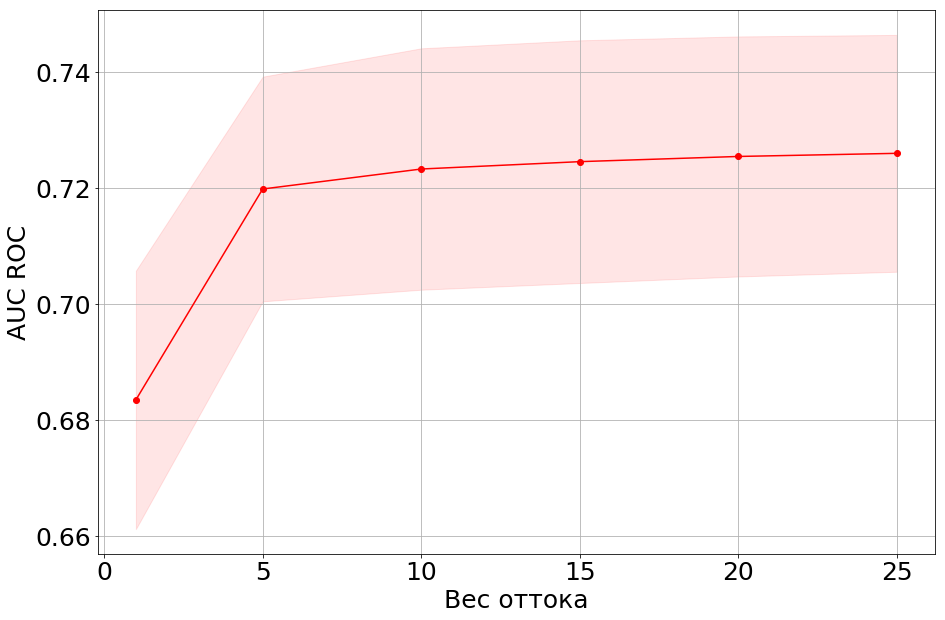

In [72]:
plot_scoring_curve(scoring_array,[1,5,10,15,20,25])

In [73]:
array_pr = []
array_rc = []
for weight_ch in [1,5,10,15,20,25]:
    LR = linear_model.LogisticRegression(C=0.02,penalty='l1', max_iter=100,n_jobs=-1, class_weight={1: weight_ch, -1: 1})
    predict = cross_validation.cross_val_predict(LR, X_transform, Y, cv = cv_strategy)
    array_pr.append(metrics.precision_score(Y, predict))
    array_rc.append(metrics.recall_score(Y, predict))
    print metrics.classification_report(Y, predict)

             precision    recall  f1-score   support

         -1       0.93      1.00      0.96     37024
          1       0.33      0.00      0.00      2976

avg / total       0.88      0.93      0.89     40000

             precision    recall  f1-score   support

         -1       0.94      0.96      0.95     37024
          1       0.28      0.19      0.22      2976

avg / total       0.89      0.90      0.89     40000

             precision    recall  f1-score   support

         -1       0.95      0.77      0.85     37024
          1       0.16      0.54      0.25      2976

avg / total       0.90      0.75      0.81     40000

             precision    recall  f1-score   support

         -1       0.97      0.55      0.70     37024
          1       0.12      0.76      0.21      2976

avg / total       0.90      0.57      0.67     40000

             precision    recall  f1-score   support

         -1       0.97      0.41      0.58     37024
          1       0.10      0.85 

График precision-recall 

In [128]:
def plot_precision_recall_curve(y_real, y_score):
    
    plt.figure(figsize=(15,10))
    plt.grid()
    precision, recall, thresholds  = metrics.precision_recall_curve(y_real, y_score)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.plot(recall, precision, color='navy',
             label=u'Кривая Precision-Recall')
    plt.xlabel('Recall',fontsize = 25)
    plt.ylabel('Precision',fontsize = 25)
    plt.ylim([0.0, 1.1])
    plt.xlim([0.0, 1])
    plt.legend(loc="lower left",fontsize = 25)
    plt.show()

### Неглубокий случайный лес

In [148]:
RF = ensemble.RandomForestClassifier(n_estimators=400,max_depth=9,n_jobs=-1,class_weight='balanced')
RF.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
y_score = RF.predict_proba(hold_out_data)

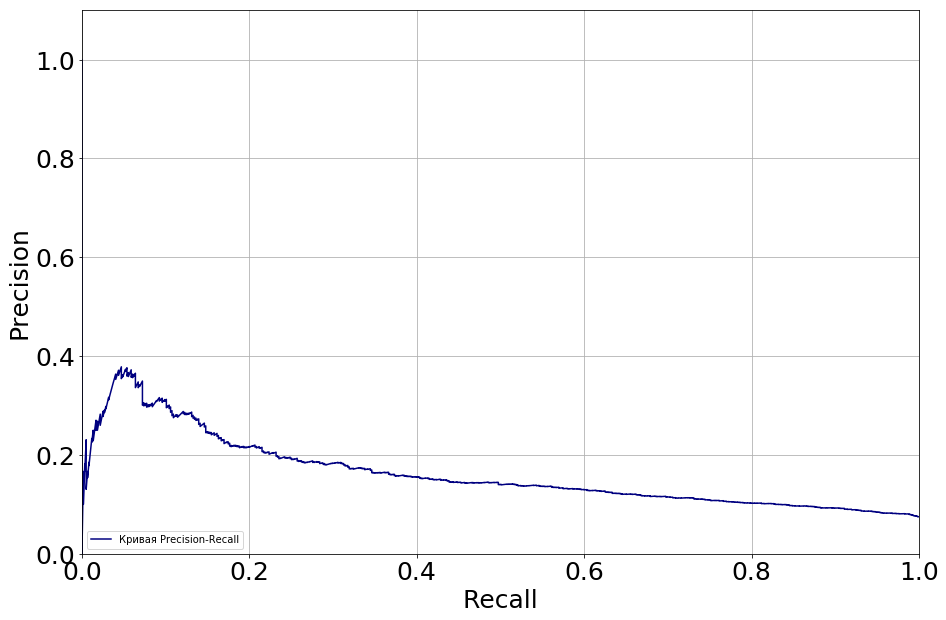

In [150]:
plot_precision_recall_curve(hold_out_labels,y_score[:,1])

### Undersumpling

In [338]:
def random_undersampling(X,Y,minor_percent=0.5):
    #minor_percent - доля минорного класса
    X_balanced = X.copy()
    Y_balanced = Y.copy()
    drop_count = X_balanced.shape[0] - int(len(X_balanced[Y==1])/minor_percent)
    index = np.random.choice(X_balanced[Y==-1].index, drop_count, replace=False)
    X_balanced.drop(index,inplace=True)
    Y_balanced.drop(index,inplace=True)
    return X_balanced,Y_balanced

In [76]:
seed = 7
hold_out_size = 0.2
X_train, X_hold_out, y_train, y_hold_out = cross_validation.train_test_split(X_transform, Y, test_size=hold_out_size, \
                                                                             random_state=seed)

In [77]:
GBC = ensemble.GradientBoostingClassifier(max_depth=3,n_estimators=100,learning_rate=0.1,subsample=0.66)

In [78]:
for minor_percent in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_balanced,Y_balanced = random_undersampling(X_train, y_train, minor_percent)
    GBC.fit(X_balanced,Y_balanced)
    print 'Доля минорного класса: {}'.format(minor_percent)
    print metrics.classification_report(y_hold_out, GBC.predict(X_hold_out))
    print metrics.roc_auc_score(y_hold_out,GBC.predict_proba(X_hold_out)[:,1])
    print '__________________________________________________________'

Доля минорного класса: 0.1
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96      7384
          1       0.46      0.05      0.08       616

avg / total       0.89      0.92      0.89      8000

0.743527049535
__________________________________________________________
Доля минорного класса: 0.2
             precision    recall  f1-score   support

         -1       0.93      0.98      0.95      7384
          1       0.35      0.14      0.20       616

avg / total       0.89      0.91      0.90      8000

0.736958683922
__________________________________________________________
Доля минорного класса: 0.3
             precision    recall  f1-score   support

         -1       0.94      0.93      0.94      7384
          1       0.26      0.28      0.27       616

avg / total       0.89      0.88      0.89      8000

0.742843534107
__________________________________________________________
Доля минорного класса: 0.4
             precision   

## Отбор переменных

#### Категориальные переменные

In [172]:
# Удалим худшие по V_Крамеру
Bottom_10_VCramer = ['Var194','Var201','Var213', 'Var203', 'Var191', 'Var196', 'Var208', 'Var223', 'Var224', 'Var215']
Bottom_15_VCramer = ['Var206', 'Var201', 'Var203', 'Var215', 'Var191', 'Var193', 'Var218', 'Var219', 'Var195',\
                     'Var194', 'Var196', 'Var212', 'Var213', 'Var210', 'Var211']

In [204]:
Categorical_var = list( set(Categorical_var) - set(Bottom_10_VCramer))

In [205]:
X = data_preprocessing(X, Categorical_var, Float_var, thr_float=0.005, thr_cat=0.005, fill = 'mean')

In [ ]:
GradientBoostingClassifier(max_depth=3,n_estimators=800,learning_rate=0.01,subsample=0.3)

%time scoring = cross_validation.cross_val_score(GBC, X, Y, scoring = 'roc_auc', cv = cv_strategy)

print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

Wall time: 34min 23s
mean: 0.741024226561, std: 0.00362293872035

    Удаление 10 худших по V Крамеру вероятно немного поднимает качетво. Хотя  интервалы в 2*std пересекаются с моделью без удаления. Хорошо бы увеличить количество фолдов до 10 для уменьшения дисперии и определенной оценки, но уж больно долго считает. 

In [41]:
Categorical_var = list( set(Categorical_var) - set(Bottom_15_VCramer))

In [42]:
X = data_preprocessing(X, Categorical_var, Float_var, thr_float=0.005, thr_cat=0.005, fill = 'mean')

In [44]:
GBC = GradientBoostingClassifier(max_depth=3,n_estimators=800,learning_rate=0.01,subsample=0.3)

%time scoring = cross_validation.cross_val_score(GBC, X, Y, scoring = 'roc_auc', cv = cv_strategy)

print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

Wall time: 23min 7s
mean: 0.726618868344, std: 0.0018039824612


      А вот тут качетсво определенно просело.

### LASSO

In [ ]:
train_data, hold_out_data, train_labels, hold_out_labels = cross_validation.train_test_split(X_transform, Y, stratify = Y, test_size = 0.2)

In [74]:
alphas = np.arange(0.0002, 0.01, 0.001)
coefs_lasso=[]
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_log,  Y)
    coefs_lasso.append(lasso_regressor.coef_)

coefs_lasso =np.asarray(coefs_lasso)

In [ ]:
%time scoring = cross_validation.cross_val_score(Lasso(0.0002), X_log, Y, scoring = 'roc_auc', cv = cv_strategy)
print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())

In [108]:
X_log.shape

(40000, 650)

In [107]:
dataframe[dataframe.iloc[:,0]!=0].sort_values(by=0, axis=0,ascending=False)[:30]

,0
1,
Var126,1.321241
Var189,0.827889
Var226,0.531673
Var210,0.426528
Var218,0.391977
Var206,0.119127
Var205,0.084792
Var73,0.083380
Var24,0.082144


In [126]:
dataframe = pd.DataFrame(zip(abs(coefs_lasso.T[:,0]),  X_log.columns)).groupby(by=1).sum()

In [ ]:
plt.figure(figsize=(10, 6))
for coef, feature in zip(coefs_lasso.T,  X_log.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.grid()
plt.xlabel("alpha")
plt.ylabel(u"Веса")
plt.title("Lasso")

Топ-50 Lasso

In [77]:
lasso_regressor = Lasso(0.002)
lasso_regressor.fit(X_log, Y)
arr = sorted( zip(lasso_regressor.coef_, X_log.columns),key=lambda x: x[0], reverse=True)
arr = pd.DataFrame(arr)[:50]
arr.iloc[:,1].values

array(['Var126', 'Var218', 'Var126', 'Var205', 'Var212', 'Var229',
       'Var211', 'Var7', 'Var65', 'Var226', 'Var193', 'Var219', 'Var44',
       'Var113', 'Var81', 'Var24', 'Var149', 'Var134', 'Var114', 'Var117',
       'Var111', 'Var112', 'Var86', 'Var150', 'Var135', 'Var119', 'Var154',
       'Var131', 'Var94', 'Var123', 'Var28', 'Var25', 'Var153', 'Var38',
       'Var21', 'Var22', 'Var45', 'Var71', 'Var6', 'Var139', 'Var3',
       'Var80', 'Var83', 'Var5', 'Var165', 'Var160', 'Var102', 'Var188',
       'Var136', 'Var108'], dtype=object)

#### Вещественные переменные

Раньше убирали категориальные теперь попробуем извавиться от лишних вещественных переменнх

In [59]:
for count in [50,75,100,125,150]:
    
    X = pd.read_csv('orange_small_churn_train_data.csv',index_col='ID')
    Y = X['labels']
    X.drop(['labels'],inplace=True,axis=1)
    Float_var = [ 'Var'+str(name) for name in Importance_float.index[:count]]
    print count
    X = data_preprocessing(X, Categorical_var, Float_var, thr_float=0.005, thr_cat=0.005, fill = 'mean')
    GBC = ensemble.GradientBoostingClassifier(max_depth=3,n_estimators=100,learning_rate=0.1,subsample=0.66)
    %time scoring = cross_validation.cross_val_score(GBC, X_transform, Y, scoring = 'roc_auc', cv = cv_strategy)
    print 'mean: {}, std: {}'.format(scoring.mean(), scoring.std())
    %time predict = cross_validation.cross_val_predict(GBC, X_transform, Y, cv = cv_strategy)
    print metrics.classification_report(Y, predict)
    print '__________________________________________________'

50
Wall time: 4min 14s
mean: 0.738716687419, std: 0.00534078824141
Wall time: 4min 10s
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96     37024
          1       0.46      0.02      0.04      2976

avg / total       0.89      0.93      0.89     40000

__________________________________________________
75
Wall time: 4min 10s
mean: 0.739794034915, std: 0.00457344641299
Wall time: 4min 12s
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96     37024
          1       0.48      0.02      0.03      2976

avg / total       0.89      0.93      0.89     40000

__________________________________________________
100
Wall time: 4min 11s
mean: 0.738692854772, std: 0.00396937563024
Wall time: 4min 11s
             precision    recall  f1-score   support

         -1       0.93      1.00      0.96     37024
          1       0.39      0.02      0.03      2976

avg / total       0.89      0.92      0.89   

# Оптимальные параметры модели.

In [66]:
X = pd.read_csv('orange_small_churn_train_data.csv',index_col='ID')
Y = X['labels']
X.drop(['labels'],inplace=True,axis=1)
Float_var = [ 'Var'+str(name) for name in Importance_float.index[:50]]
Categorical_var = list( set(Categorical_var) - set(Bottom_10_VCramer))
X = data_preprocessing(X, Categorical_var, Float_var, thr_float=0.005, thr_cat=0.005, fill = 'mean')

In [75]:
parameters_grid = {
    'max_depth' : [3,4,6],
    'subsample' : [0.3, 0.5, 0.66],
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [100,200,300,400,800],
}

In [76]:
randomized_grid_cv = grid_search.RandomizedSearchCV(ensemble.GradientBoostingClassifier(), parameters_grid, scoring = 'roc_auc', cv = cv_strategy, n_iter = 15, 
                                                   random_state = 0)

In [77]:
%%time
randomized_grid_cv.fit(X, Y)

Wall time: 3h 47min 24s


RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[-1 -1 ..., -1 -1], n_folds=5, shuffle=False, random_state=0),
          error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 800], 'subsample': [0.3, 0.5, 0.66], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 6]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring='roc_auc', verbose=0)

In [78]:
randomized_grid_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=800, presort='auto', random_state=None,
              subsample=0.66, verbose=0, warm_start=False)

In [79]:
print randomized_grid_cv.best_score_
print randomized_grid_cv.best_params_

0.742628415981
{'n_estimators': 800, 'subsample': 0.66, 'learning_rate': 0.01, 'max_depth': 6}


## Замечания

1. Можно проверить еще несколько вариантов стэкинга, с помощью реализованной модели получить практически значимых результатов не удалось. 
2. Попытки поискать структуру DBScan, KNN методами и добвить их предсказания в качестве новых признаков в дата сет ни к чему не приводили. Перед использованием размерность данных понижалась sklearn.docomposition.PCA методом главных компонент до 50, 75 и 100. 
3. Удалось получить AUC логистической регресии всего на 0.01 отличающийся от AUC градиентного бустинга, качество регресси удалось сильно поднять за счет преобразования вещественных по типу переменных с небольшим колличеством значений в категориальные.